# Sales Analysis and Business Patterns
This notebook analyzes sales data to identify patterns, trends, and business opportunities.

## 1. Environment Setup
First, we'll import the necessary libraries and configure our visualization settings.

In [10]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# General visualization settings
plt.style.use('default')  # Cambiamos 'seaborn' por 'default'
sns.set_theme(style="whitegrid")  # Configuración más moderna de seaborn
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['font.size'] = 12

## 2. Data Loading and Initial Exploration
We'll start by loading our dataset and preparing it for analysis. We'll convert dates to the proper format and set up our monthly categories for temporal analysis.

In [13]:
# Load the dataset
df = pd.read_csv('sales_data.csv')

# Convert date column
df['Date'] = pd.to_datetime(df['Date'])

# Sort months for visualizations
monthly_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=monthly_order, ordered=True)

## 3. Initial Data Analysis
Let's examine our dataset structure, check for any data quality issues, and understand our basic statistics.

In [22]:
# Dataset overview
print("Dataset Overview:")
print(df.info())

print("\nFirst rows of the dataset:")
print(df.head())

print("\nBasic statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Unique values in categorical columns
print("\nUnique values in Product Category:")
print(df['Product Category'].unique())

print("\nUnique values in Region:")
print(df['Region'].unique())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              300 non-null    datetime64[ns]
 1   Product Category  300 non-null    object        
 2   Sales             300 non-null    int64         
 3   Discount          300 non-null    int64         
 4   Region            300 non-null    object        
 5   Promotion         300 non-null    object        
 6   Month             300 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(2), object(3)
memory usage: 14.9+ KB
None

First rows of the dataset:
        Date Product Category  Sales  Discount Region Promotion     Month
0 2023-01-01             Toys     81        12  South        No     March
1 2023-01-02        Groceries    560        15  South        No  November
2 2023-01-03         Clothing    545        16   East 

## 4. Temporal Analysis
In this section, we'll analyze sales patterns over time, identifying seasonal trends and key patterns in our data.

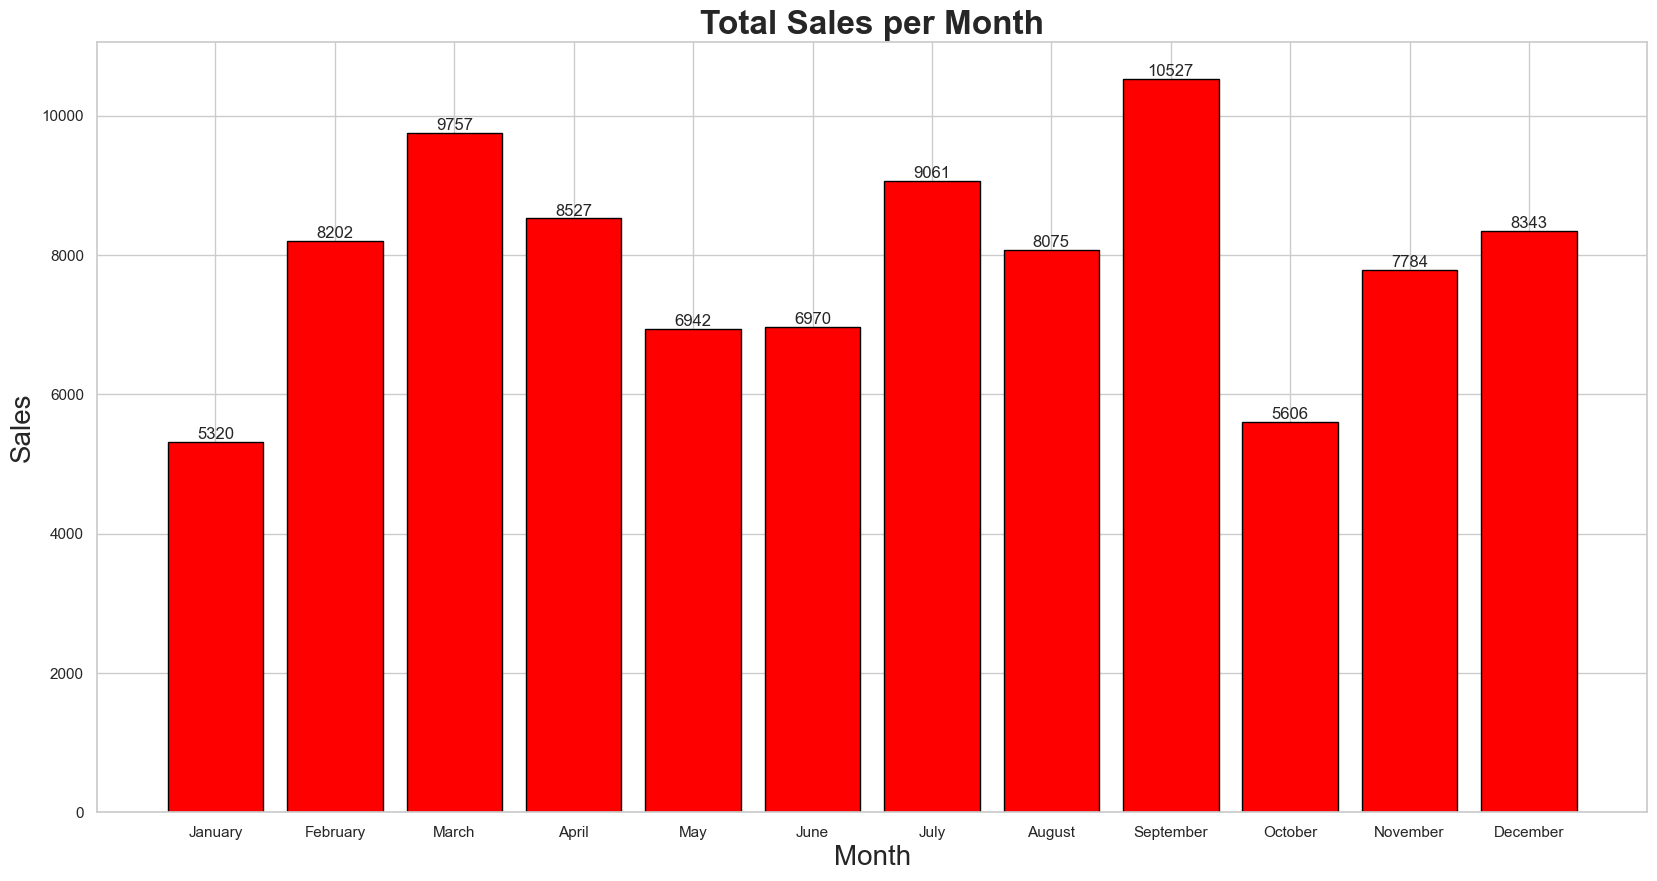

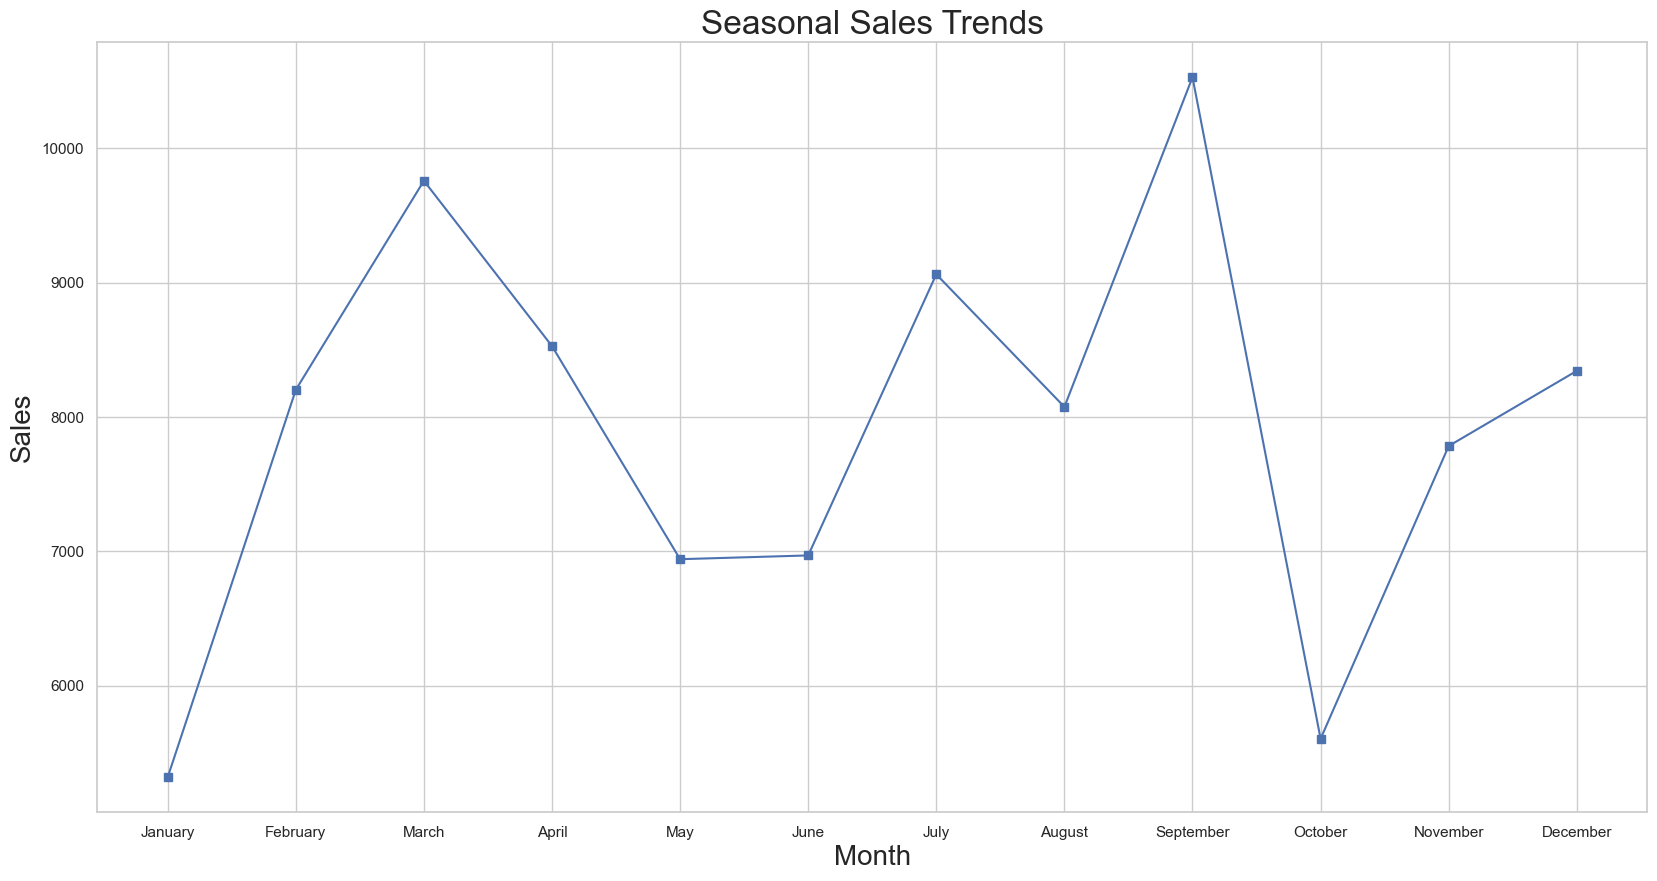

In [27]:
# Calculate monthly sales with observed=True to handle categoricals properly
monthly_sales = df.groupby('Month', observed=True)['Sales'].sum()

# Create enhanced monthly sales visualization
plt.figure(figsize=(20, 10))
bars = plt.bar(monthly_sales.index, monthly_sales.values, color='red', edgecolor='black')
plt.bar_label(bars)

plt.title('Total Sales per Month', fontsize=24, fontweight='bold')
plt.xlabel('Month', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.grid(True)
plt.show()

# Create trend line for seasonal analysis
plt.figure(figsize=(20, 10))
plt.plot(monthly_sales.index, monthly_sales.values, marker='s')
plt.title('Seasonal Sales Trends', fontsize=24)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.grid(True)

# Add annotations for sales peaks
plt.annotate('Sales Peak', xy=(2, 2690), xytext=(0, 2750),
             arrowprops=dict(color='black', arrowstyle='->'), fontsize=16)
plt.annotate('Sales Peak', xy=(8, 2700), xytext=(0, 2750),
             arrowprops=dict(color='black', arrowstyle='->'), fontsize=16)
plt.annotate('Sales Peak', xy=(11, 2800), xytext=(0, 2750),
             arrowprops=dict(color='black', arrowstyle='->'), fontsize=16)
plt.show()

## 5. Product Category Analysis
In this section, we'll examine the performance and distribution of sales across different product categories using various visualization techniques.

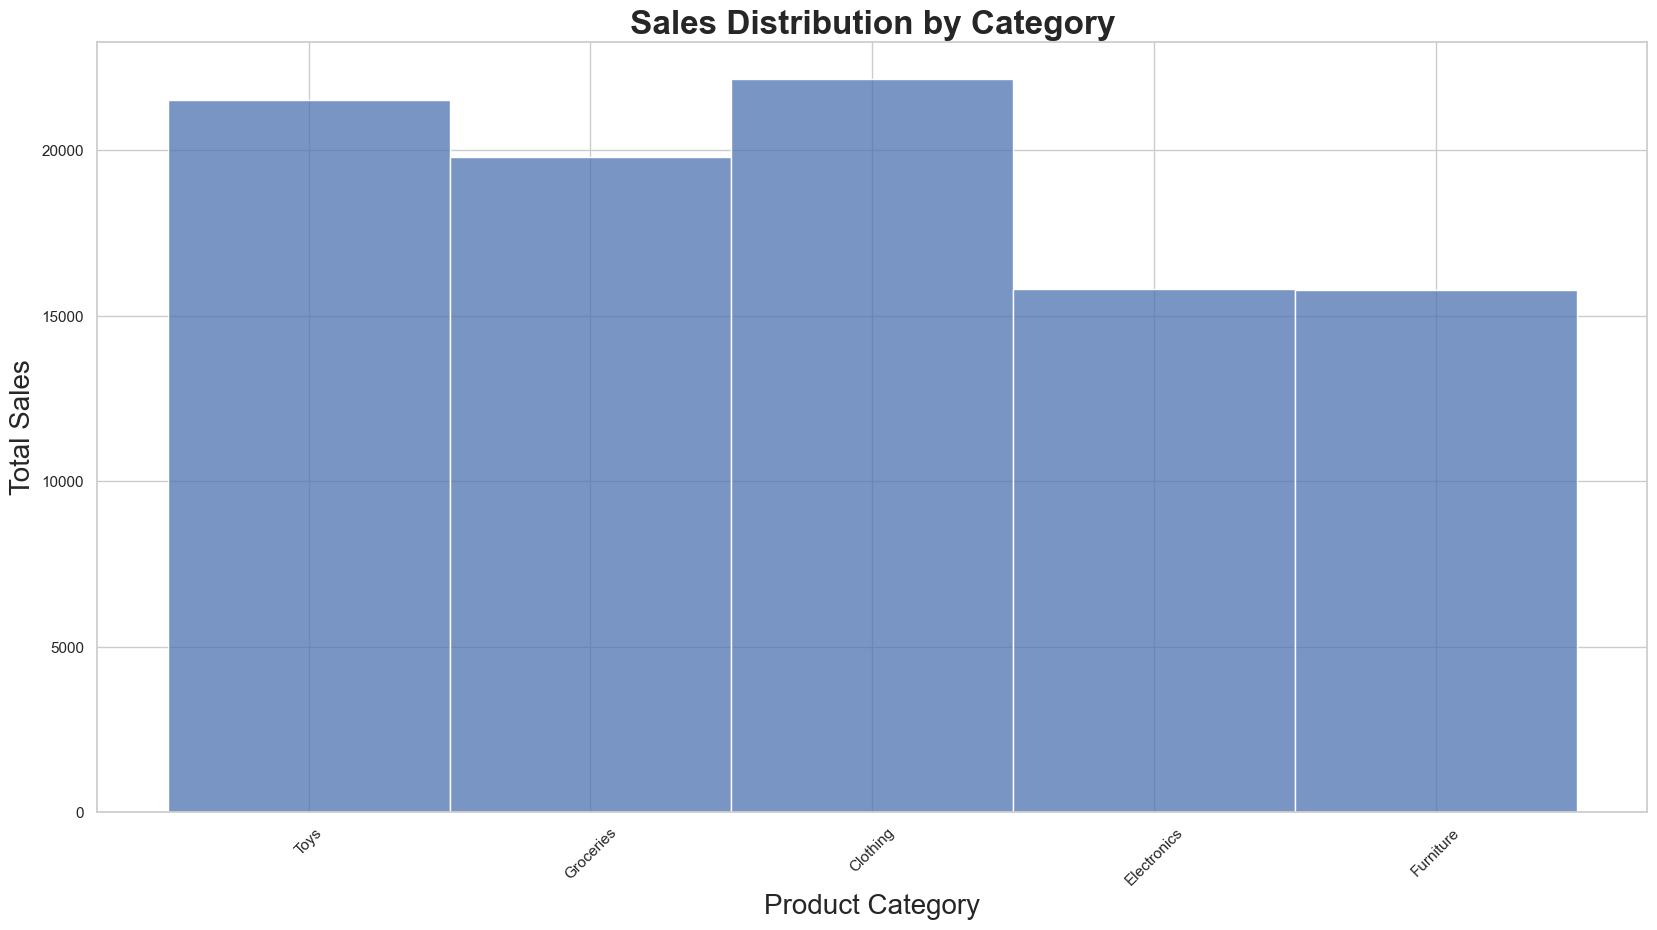

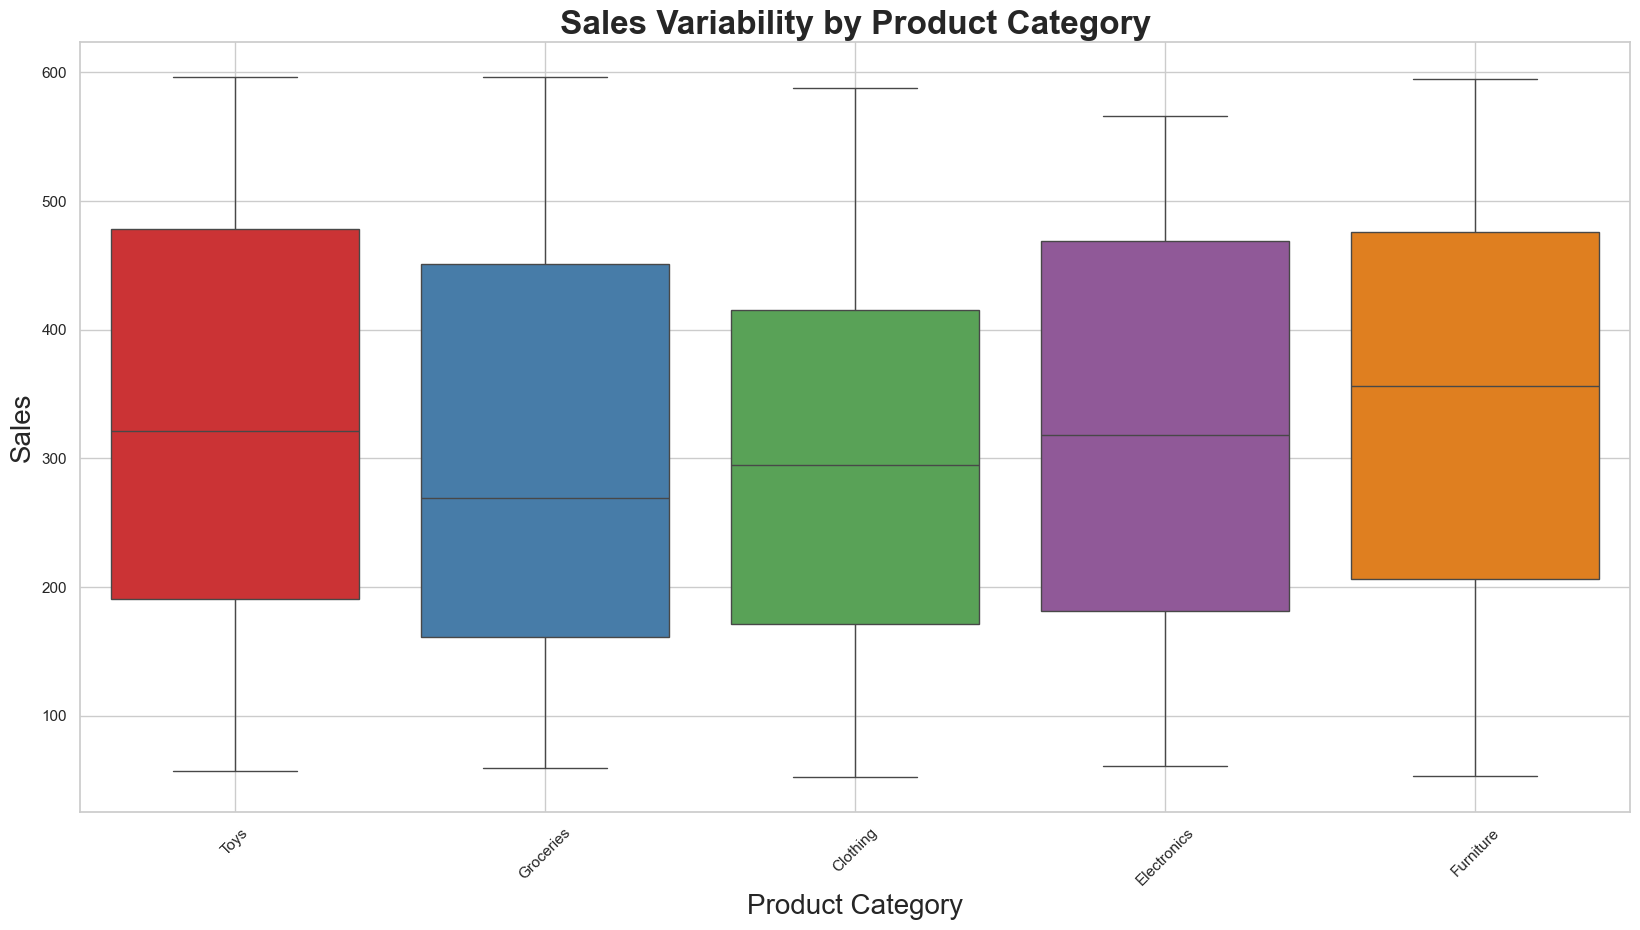

In [34]:
# Create sales distribution by category
plt.figure(figsize=(20, 10))
sns.histplot(data=df, x='Product Category', weights='Sales', stat='count')
plt.title('Sales Distribution by Category', fontsize=24, fontweight='bold')
plt.xlabel('Product Category', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Create boxplot for sales variability by category
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='Product Category', y='Sales', hue='Product Category', palette="Set1", legend=False)
plt.title("Sales Variability by Product Category", fontsize=24, fontweight='bold')
plt.xlabel("Product Category", fontsize=20)
plt.ylabel("Sales", fontsize=20)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Category Performance Analysis
This section analyzes the performance metrics for each product category from two perspectives:

1. **Average Sales per Transaction**: Shows the typical transaction value for each category, helping identify high-value product categories.

2. **Total Sales vs Transaction Volume**: Compares the total revenue generated by each category against the number of transactions, revealing both volume and value patterns.

The following visualizations will help us understand:
- Which categories generate the highest average sales
- How sales volume relates to transaction frequency
- Potential opportunities for category-specific strategies

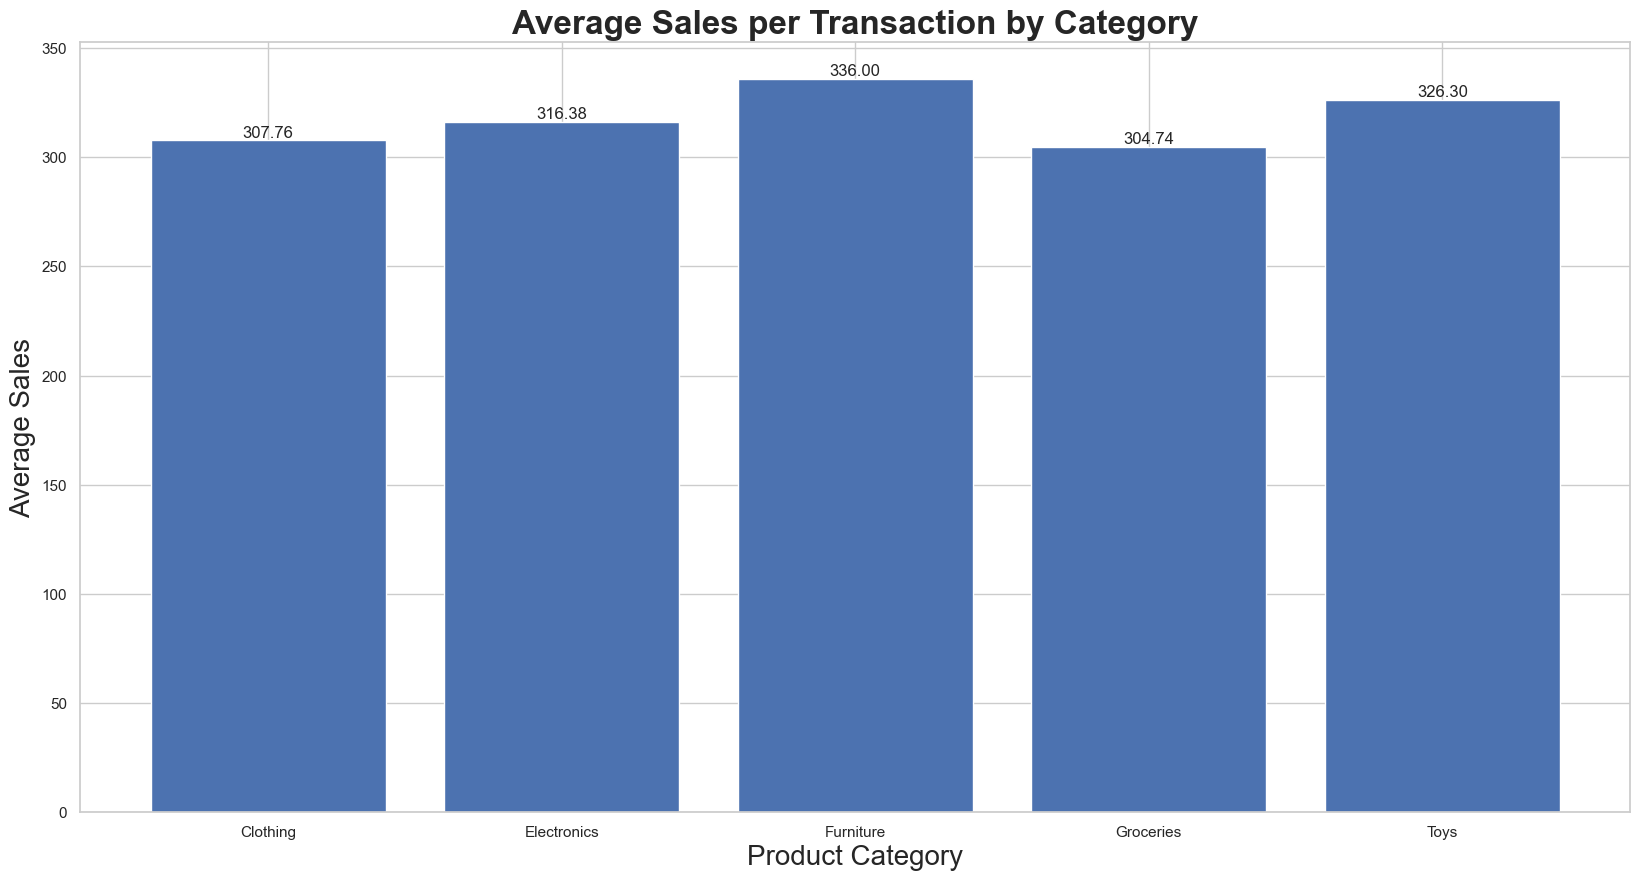

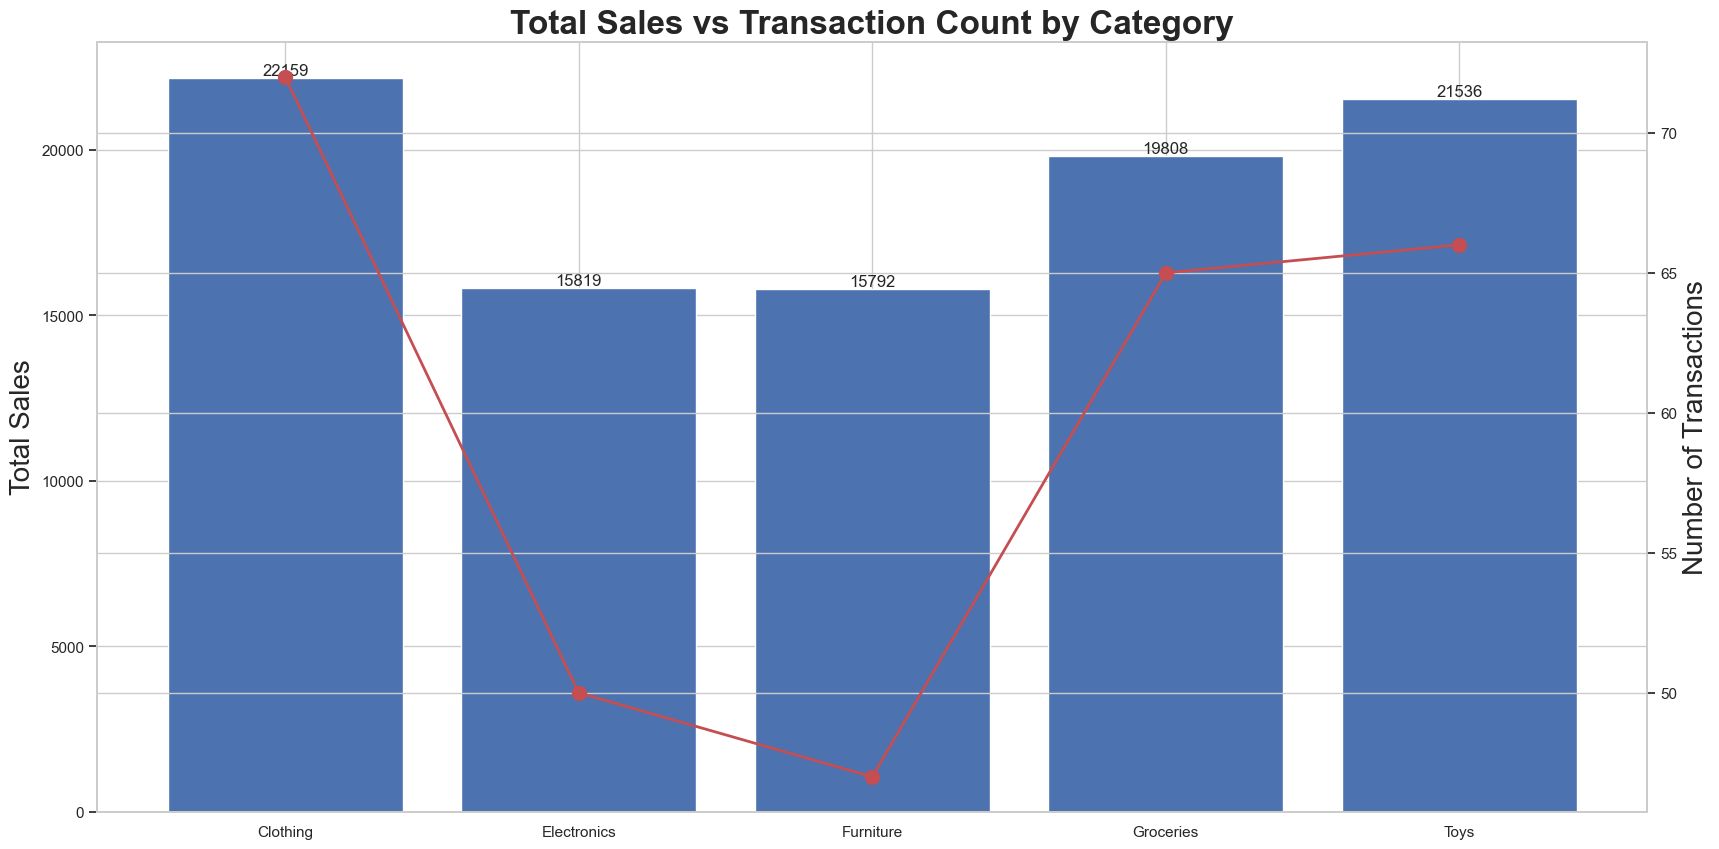

In [63]:
# Average sales by category
plt.figure(figsize=(20, 10))
avg_sales_by_category = df.groupby('Product Category', observed=True)['Sales'].mean()
bars = plt.bar(avg_sales_by_category.index, avg_sales_by_category.values)
plt.bar_label(bars, fmt='%.2f')
plt.title('Average Sales per Transaction by Category', fontsize=24, fontweight='bold')
plt.xlabel('Product Category', fontsize=20)
plt.ylabel('Average Sales', fontsize=20)
plt.grid(True)
plt.show()

# Total sales and transaction count by category
fig, ax1 = plt.subplots(figsize=(20, 10))

# Plot total sales
total_sales_by_category = df.groupby('Product Category', observed=True)['Sales'].sum()
bars = ax1.bar(total_sales_by_category.index, total_sales_by_category.values)
ax1.set_ylabel('Total Sales', fontsize=20)
ax1.bar_label(bars)

# Plot transaction count on secondary axis
ax2 = ax1.twinx()
transaction_count = df.groupby('Product Category', observed=True).size()
line = ax2.plot(transaction_count.index, transaction_count.values, 'ro-', linewidth=2, markersize=10)
ax2.set_ylabel('Number of Transactions', fontsize=20)

plt.title('Total Sales vs Transaction Count by Category', fontsize=24, fontweight='bold')
plt.grid(True)
plt.show()

## 6. Promotion Impact Analysis
In this section, we'll analyze how promotions affect our sales performance and identify patterns in promotional effectiveness.

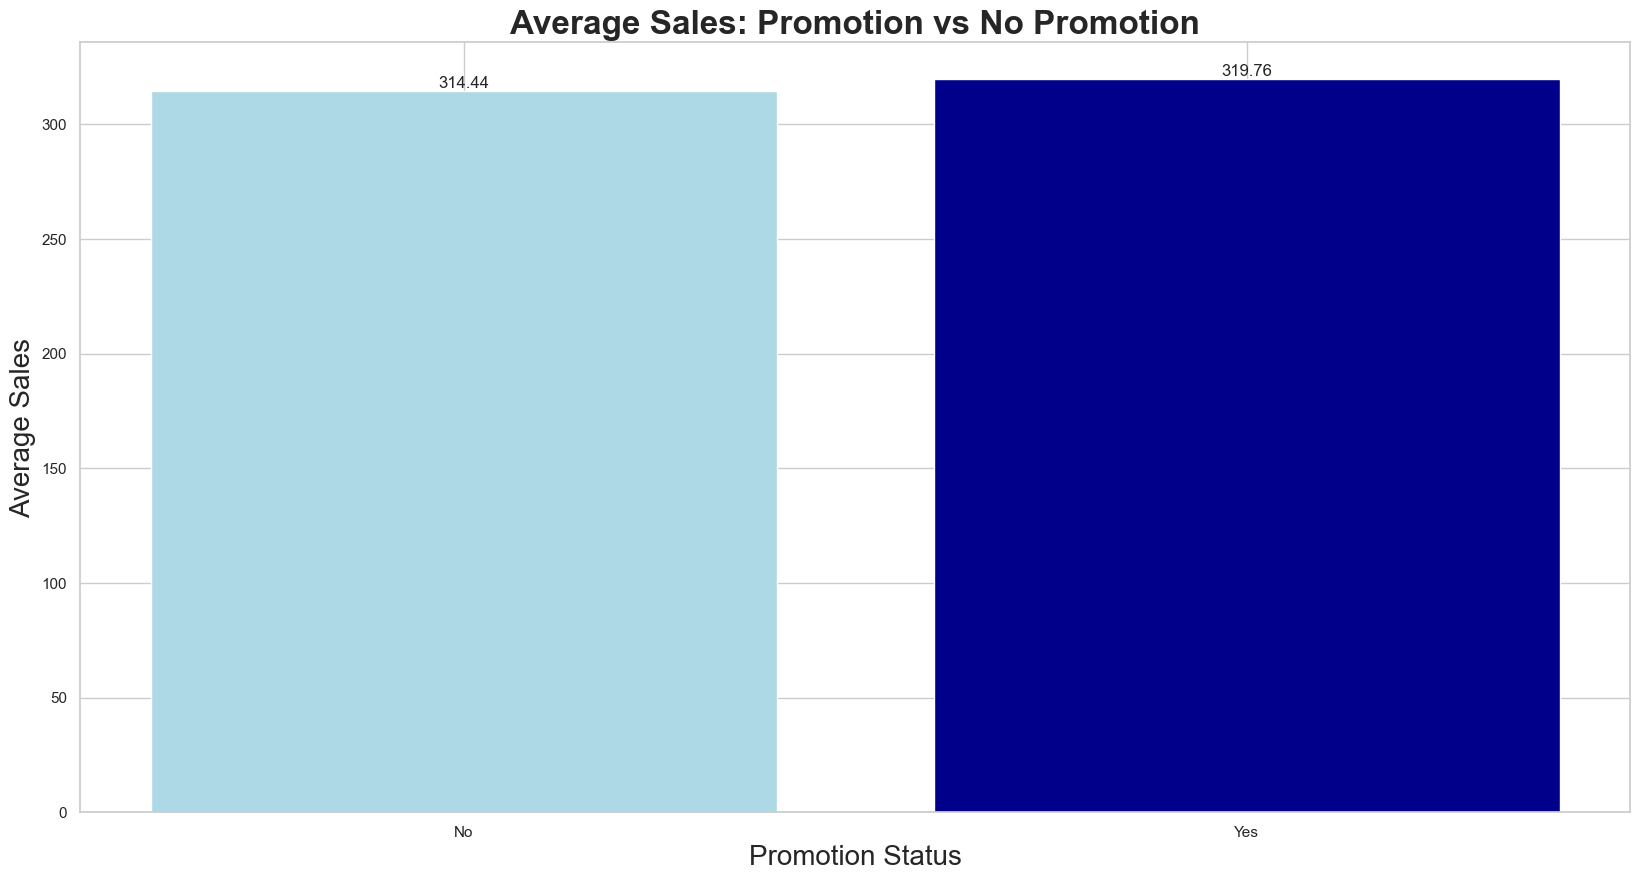

<Figure size 2000x1000 with 0 Axes>

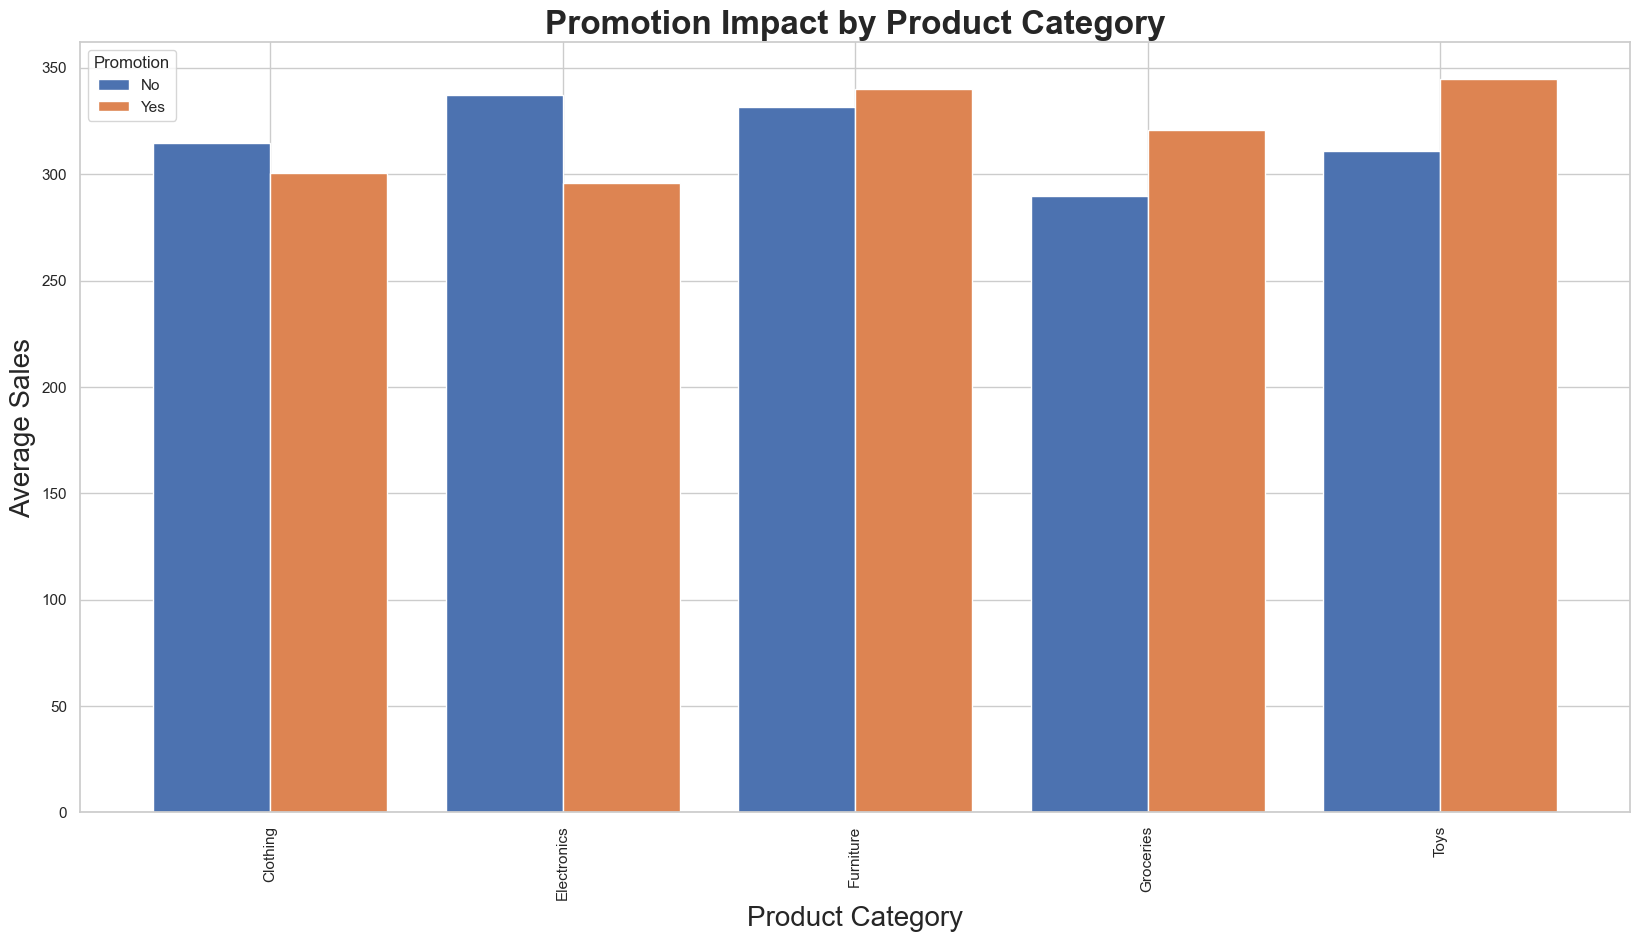

In [39]:
# Comparison of average sales with and without promotions
plt.figure(figsize=(20, 10))
avg_sales_by_promo = df.groupby('Promotion')['Sales'].mean()
bars = plt.bar(avg_sales_by_promo.index, avg_sales_by_promo.values, color=['lightblue', 'darkblue'])
plt.bar_label(bars, fmt='%.2f')
plt.title('Average Sales: Promotion vs No Promotion', fontsize=24, fontweight='bold')
plt.xlabel('Promotion Status', fontsize=20)
plt.ylabel('Average Sales', fontsize=20)
plt.grid(True)
plt.show()

# Additional insight: Promotion effectiveness by product category
plt.figure(figsize=(20, 10))
avg_sales_by_category = df.groupby(['Product Category', 'Promotion'])['Sales'].mean().unstack()
avg_sales_by_category.plot(kind='bar', width=0.8)
plt.title('Promotion Impact by Product Category', fontsize=24, fontweight='bold')
plt.xlabel('Product Category', fontsize=20)
plt.ylabel('Average Sales', fontsize=20)
plt.legend(title='Promotion')
plt.grid(True)
plt.show()

## 7. Discount and Sales Relationship Analysis
In this section, we'll explore how different discount levels affect sales performance and identify potential patterns in pricing strategy.

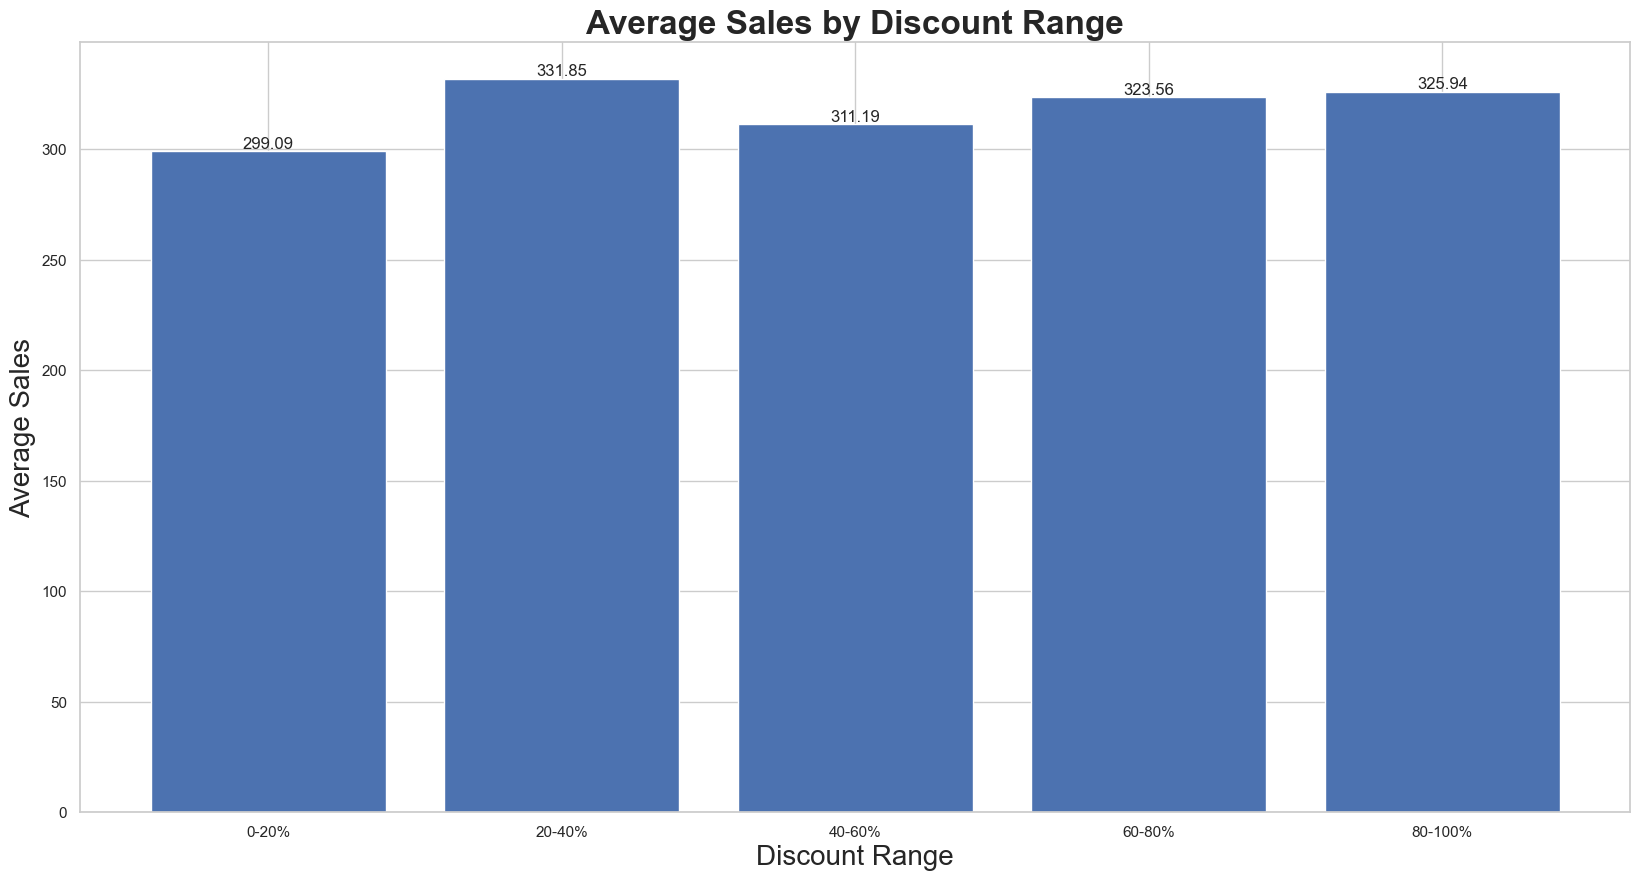

In [55]:


# Average sales by discount ranges
df['Discount_Range'] = pd.cut(df['Discount'], bins=5, labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
avg_sales_by_discount = df.groupby('Discount_Range', observed=True)['Sales'].mean()

plt.figure(figsize=(20, 10))
bars = plt.bar(avg_sales_by_discount.index, avg_sales_by_discount.values)
plt.bar_label(bars, fmt='%.2f')
plt.title('Average Sales by Discount Range', fontsize=24, fontweight='bold')
plt.xlabel('Discount Range', fontsize=20)
plt.ylabel('Average Sales', fontsize=20)
plt.grid(True)
plt.show()

## 8.Regional Sales Analysis
Let's analyze sales patterns across different regions using visualizations.

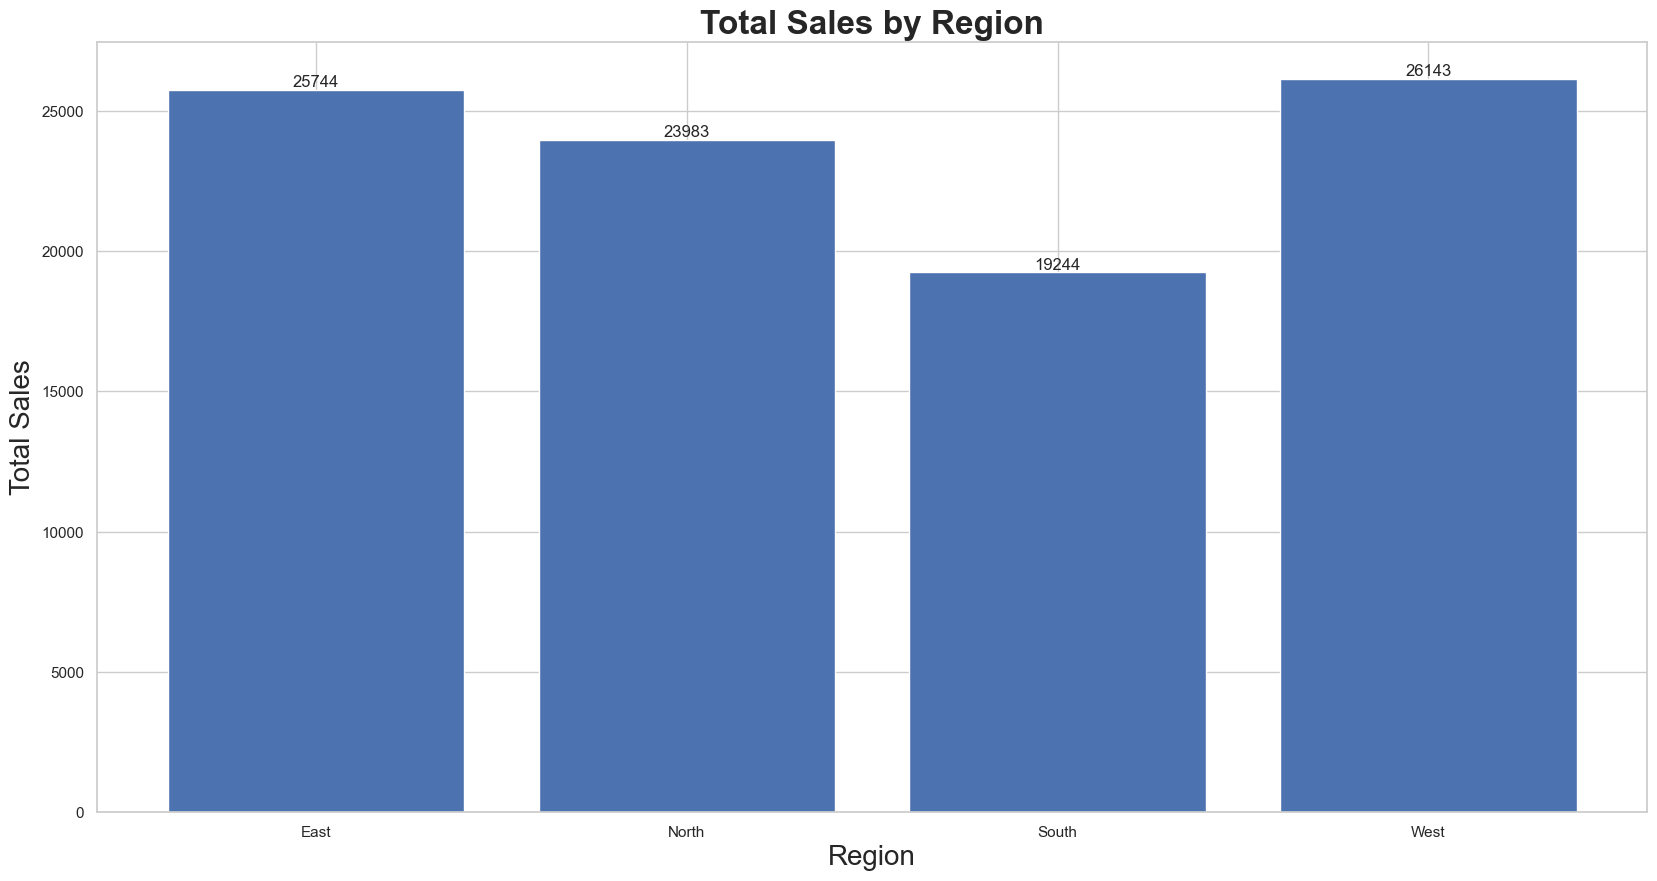

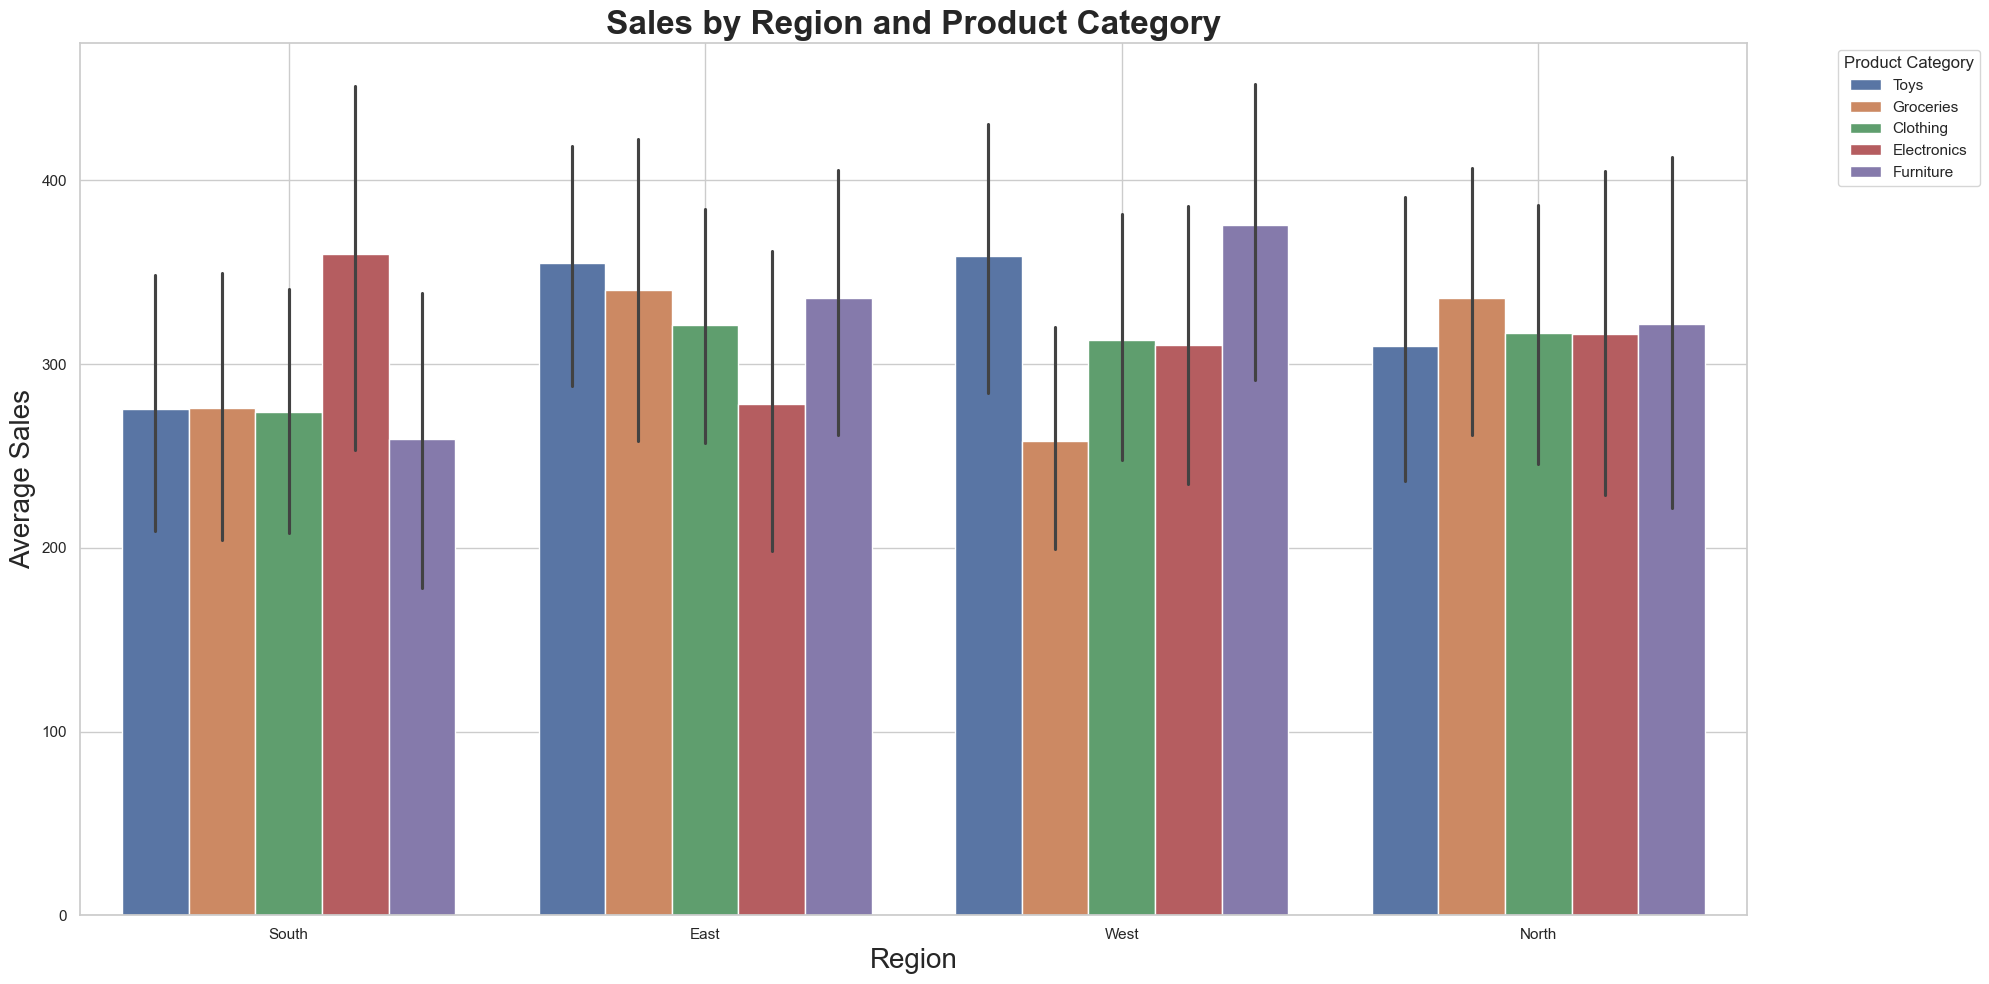

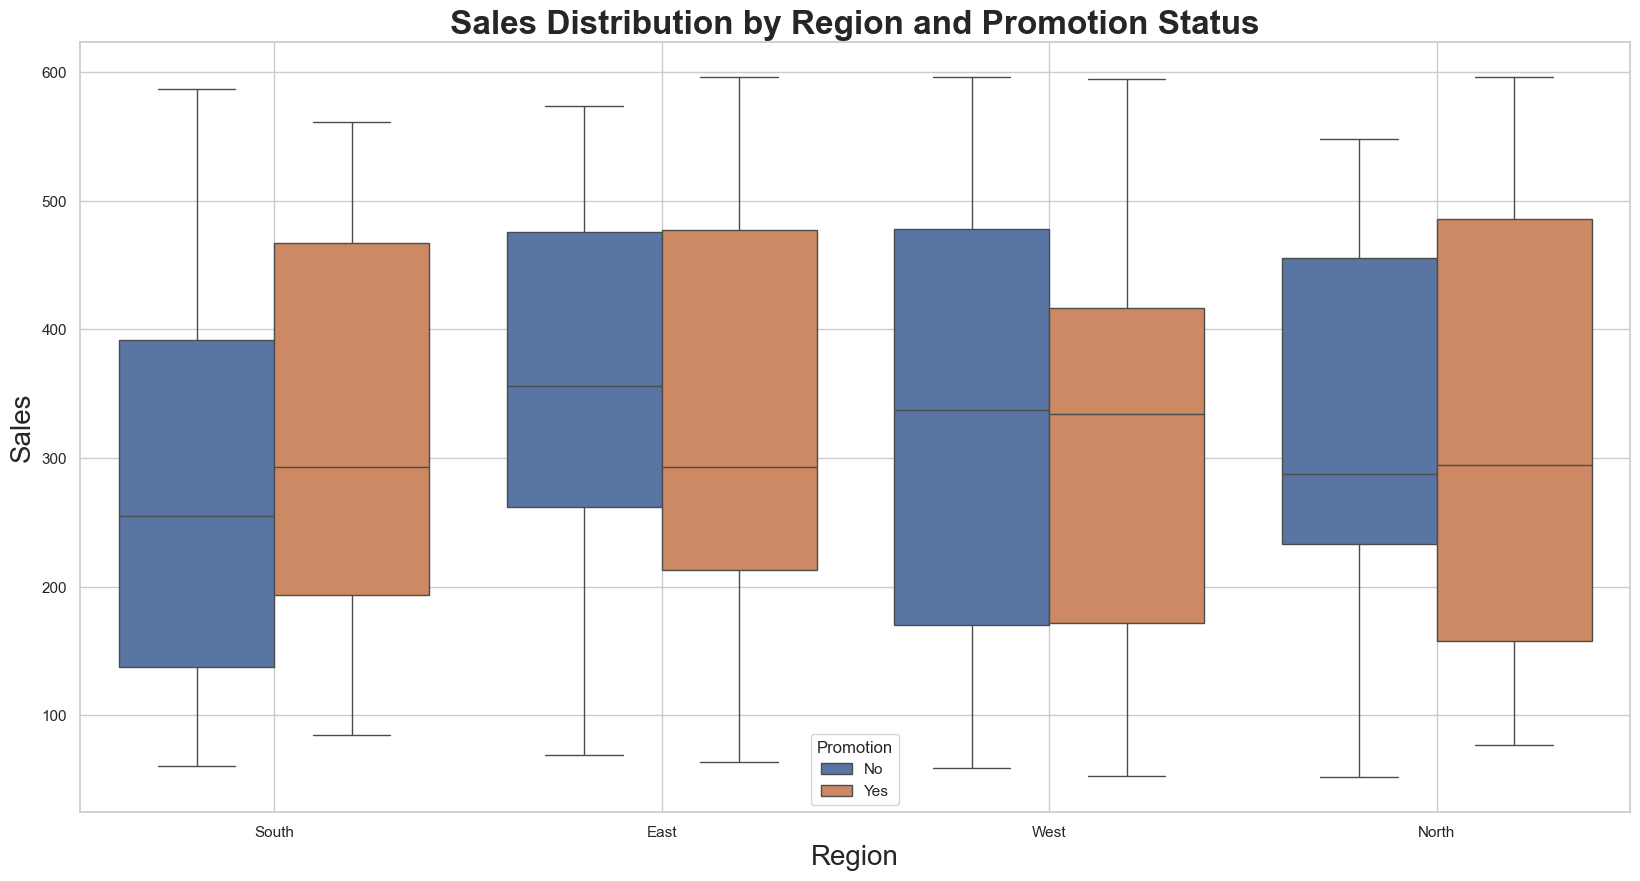

In [59]:
# Total sales by region
plt.figure(figsize=(20, 10))
region_sales = df.groupby('Region', observed=True)['Sales'].sum()
bars = plt.bar(region_sales.index, region_sales.values)
plt.bar_label(bars)
plt.title('Total Sales by Region', fontsize=24, fontweight='bold')
plt.xlabel('Region', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.grid(True)
plt.show()

# Region and category interaction
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x='Region', y='Sales', hue='Product Category')
plt.title('Sales by Region and Product Category', fontsize=24, fontweight='bold')
plt.xlabel('Region', fontsize=20)
plt.ylabel('Average Sales', fontsize=20)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Region and promotion interaction
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='Region', y='Sales', hue='Promotion')
plt.title('Sales Distribution by Region and Promotion Status', fontsize=24, fontweight='bold')
plt.xlabel('Region', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.legend(title='Promotion')
plt.grid(True)
plt.show()

## 9. Key Insights

### Sales Patterns and Category Performance
- Furniture shows the highest average sale value (336 per transaction)
- Toys and Electronics follow with averages of 326 and 316 respectively
- Clothing and Groceries show similar performance (~305-308 per transaction)
- Product categories are relatively well-balanced in terms of transaction volume

### Regional Performance
- West region leads in total sales (26,143) with 80 transactions
- East region follows closely (25,744) with 78 transactions
- North and South regions show lower performance but remain competitive
- Transaction distribution is relatively uniform across regions (67-80 transactions)

### Promotional Impact
- Promotional sales show slightly higher average value (319.76 vs 314.44)
- The difference is minimal (1.7% increase), suggesting need for promotion optimization
- Nearly balanced distribution between promotional (147) and non-promotional (153) sales

### Category-Specific Opportunities
- Furniture's high average sale value suggests potential for premium pricing
- Electronics and Toys show strong performance potential
- Groceries and Clothing might benefit from bundle strategies to increase average sale value

### Strategic Recommendations
1. **Promotional Strategy:**
   - Reevaluate promotion structure due to minimal impact
   - Consider category-specific promotions
   - Test targeted regional promotions

2. **Regional Focus:**
   - Investigate South region's lower performance
   - Replicate West region's success factors
   - Develop region-specific marketing strategies

3. **Category Management:**
   - Leverage Furniture's premium position
   - Develop cross-category promotions
   - Focus on increasing transaction volume in Electronics

4. **Pricing Strategy:**
   - Optimize pricing tiers based on regional performance
   - Develop category-specific discount strategies
   - Test premium pricing in high-performing regions